In [1020]:
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [1021]:
train_data = pd.read_csv("train.csv")

In [1022]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1023]:
test_data = pd.read_csv("test.csv")

In [1024]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1025]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1026]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1027]:
train_reg = train_data.copy()

In [1028]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1029]:
train_data['Surname'] = train_data['Name'].str.split(',').str.get(0)

In [1030]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [1031]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Surname          0
dtype: int64

In [1032]:
train_data.duplicated().sum()

0

In [1033]:
len(train_data['Surname'].unique())

667

In [1034]:
train_data['Surname'].value_counts()

Andersson    9
Sage         7
Johnson      6
Goodwin      6
Skoog        6
            ..
Fynney       1
Keefe        1
Hegarty      1
Lundahl      1
Ohman        1
Name: Surname, Length: 667, dtype: int64

In [1035]:
train_data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F2             3
              ..
A31            1
B80            1
A6             1
A19            1
A34            1
Name: Cabin, Length: 147, dtype: int64

In [1036]:
train_data.loc[train_data.Cabin == 'B96 B98']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S,Carter
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S,Carter
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S,Carter
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S,Carter


In [1037]:
s = train_data['Survived'].value_counts(dropna=False)

In [1038]:
s

0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survival breakdown')

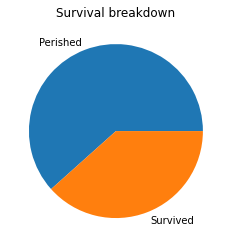

In [1039]:
fig, ax = plt.subplots()
ax.pie(s, labels=['Perished', 'Survived'])
plt.title("Survival breakdown")

In [1040]:
train_data['Survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [1041]:
len(train_data['Ticket'].unique())

681

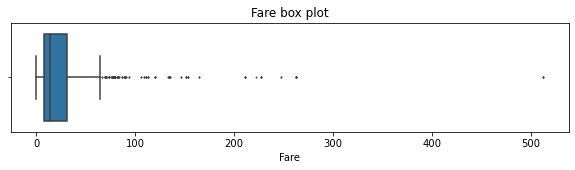

In [1042]:
plt.figure(figsize=(10,2))
sns.boxplot(x=train_data['Fare'], fliersize=1)
plt.title('Fare box plot');

Fares above 65 or so are considered outliers.

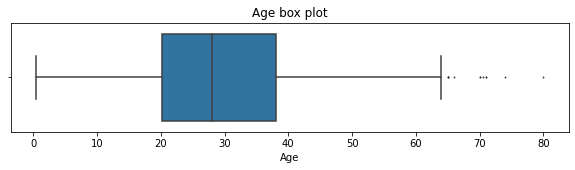

In [1043]:
plt.figure(figsize=(10,2))
sns.boxplot(x=train_data['Age'], fliersize=1)
plt.title('Age box plot');

Above around 64 years old are where the outliers are.

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

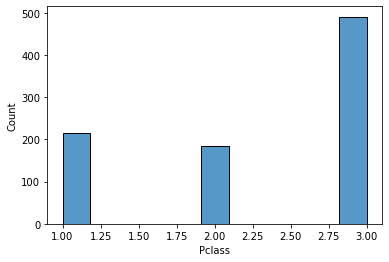

In [1044]:
sns.histplot(train_data, x="Pclass")

In [1045]:
s = train_data['Pclass'].value_counts()

In [1046]:
s

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [1047]:
type(s)

pandas.core.series.Series

Text(0.5, 1.0, 'Class breakdown')

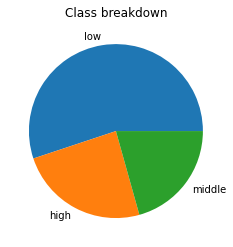

In [1048]:
fig, ax = plt.subplots()
ax.pie(s, labels=['low', 'high', 'middle'])
plt.title("Class breakdown")

Text(0.5, 1.0, 'Survival by Class')

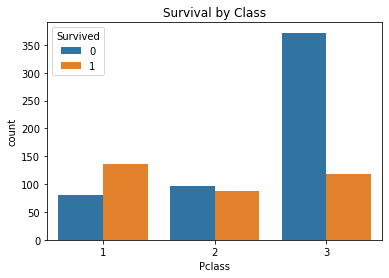

In [1049]:
sns.countplot(data=train_data, x="Pclass", hue="Survived")
plt.title("Survival by Class")

Passengers in 1st class had the highest probability of surviving.  Passengers in 3rd class had the poorest survival rates.  Passengers in 2nd class were in the middle.  The higher your class was on the ship, the higher your survivability.  

In [1050]:
#train_data[train_data['Pclass'] == 3]['Survived'].value_counts(dropna = False)

Text(0.5, 1.0, 'Number of males and females')

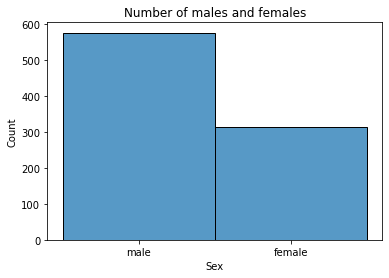

In [1051]:
sns.histplot(train_data, x="Sex")
plt.title("Number of males and females")

In [1052]:
s = train_data["Sex"].value_counts()

In [1053]:
s

male      577
female    314
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Sex breakdown')

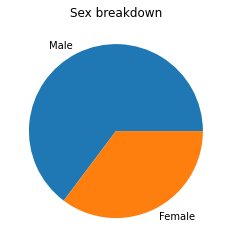

In [1054]:
fig, ax = plt.subplots()
ax.pie(s, labels=['Male', 'Female'])
plt.title("Sex breakdown")

Text(0.5, 1.0, 'Survival by Sex')

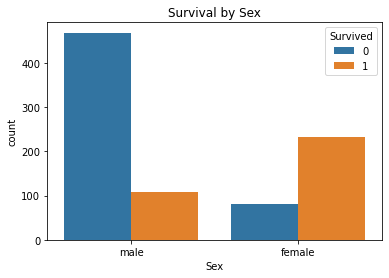

In [1055]:
sns.countplot(data=train_data, x="Sex", hue="Survived")
plt.title("Survival by Sex")

Females had a much higher probability of surviving than males.  

In [1056]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


Text(0.5, 1.0, 'Survival by Port of Embarkation')

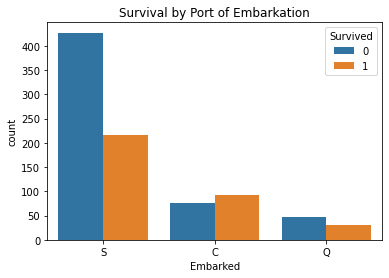

In [1057]:
sns.countplot(data = train_data, x="Embarked", hue="Survived")
plt.title("Survival by Port of Embarkation")

Passengers that embarked from C (Cherbourg) had the best chance of surviving.  Passengers that embarked from S (Southampton) had the worst chance of surviving.  Passengers that embarked from Q (Queenstown) were inbetween.

Text(0.5, 1.0, 'Port of Embarkation')

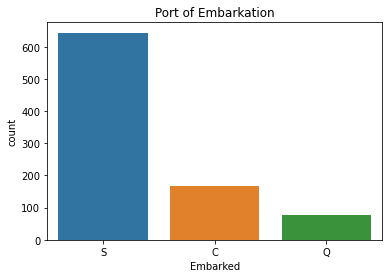

In [1058]:
sns.countplot(data = train_data, x="Embarked")
plt.title("Port of Embarkation")

In [1059]:
s = train_data['Embarked'].value_counts()

Text(0.5, 1.0, 'Port of Embarkation')

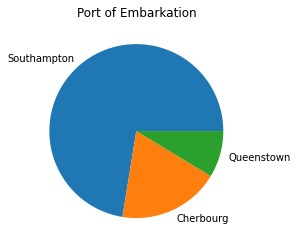

In [1060]:
fig, ax = plt.subplots()
ax.pie(s, labels=['Southampton', 'Cherbourg', 'Queenstown'])
plt.title("Port of Embarkation")

Text(0.5, 1.0, 'Class breakdown by Port of Embarkation')

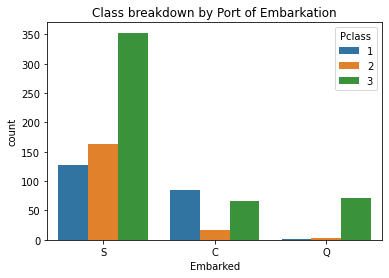

In [1061]:
sns.countplot(data = train_data, x="Embarked", hue="Pclass")
plt.title("Class breakdown by Port of Embarkation")

C (Cherbourg) had the highest proportion of 1st class passengers.  Southampton had the highest proportion of 3rd class passengers.  

Text(0.5, 1.0, 'Survival by Fare')

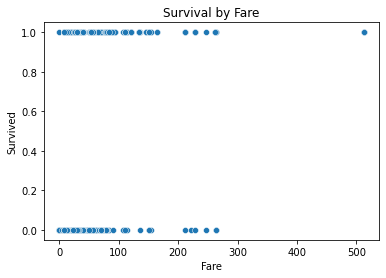

In [1062]:
sns.scatterplot(data=train_data, x="Fare", y="Survived")
plt.title("Survival by Fare")

Text(0.5, 1.0, 'Fare box plot based on survival')

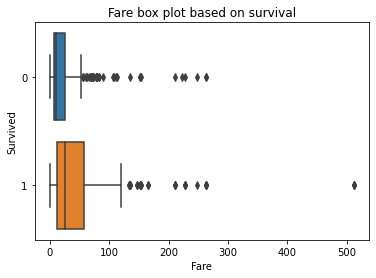

In [1063]:
sns.boxplot(data=train_data, x='Fare', y="Survived", orient='h')
plt.title("Fare box plot based on survival")

Survivors tend to have paid more for their fares.

In [1064]:
def categorize_age(age):
    if age <= 1:
        return 'Infant'
    elif age < 13:
        return 'Child'
    elif age < 20:
        return 'Teen'
    elif age < 55:
        return 'Adult'
    elif age >= 55:
        return 'Senior'
    else:
        return age
        

train_data['AgeGroup'] = train_data['Age'].apply(categorize_age)



In [1065]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Adult


Text(0.5, 1.0, 'Survival by AgeGroup')

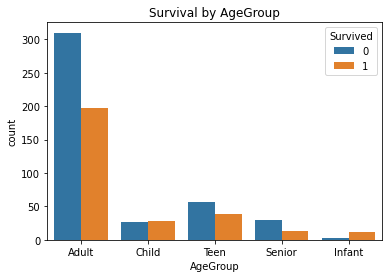

In [1066]:
sns.countplot(data=train_data, x="AgeGroup", hue="Survived")
plt.title("Survival by AgeGroup")

Children and Infants had the best survivability rates.  Seniors fared the worst.

In [1067]:
s = train_data['AgeGroup'].value_counts()

Text(0.5, 1.0, 'Age Groups')

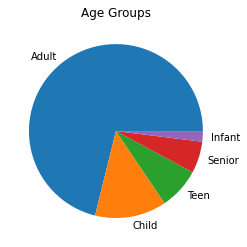

In [1068]:
fig, ax = plt.subplots()
ax.pie(s, labels=['Adult', 'Child', 'Teen', 'Senior', 'Infant'])
plt.title("Age Groups")

In [1069]:
len(train_data['Fare'].unique())

248

In [1070]:
s = train_data[train_data['Pclass'] == 1]['Fare']

In [1071]:
print(s)

1      71.2833
3      53.1000
6      51.8625
11     26.5500
23     35.5000
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: Fare, Length: 216, dtype: float64


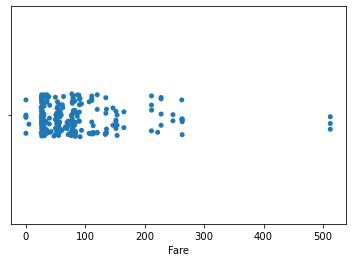

In [1072]:
sns.stripplot(x = s)
plt.show()

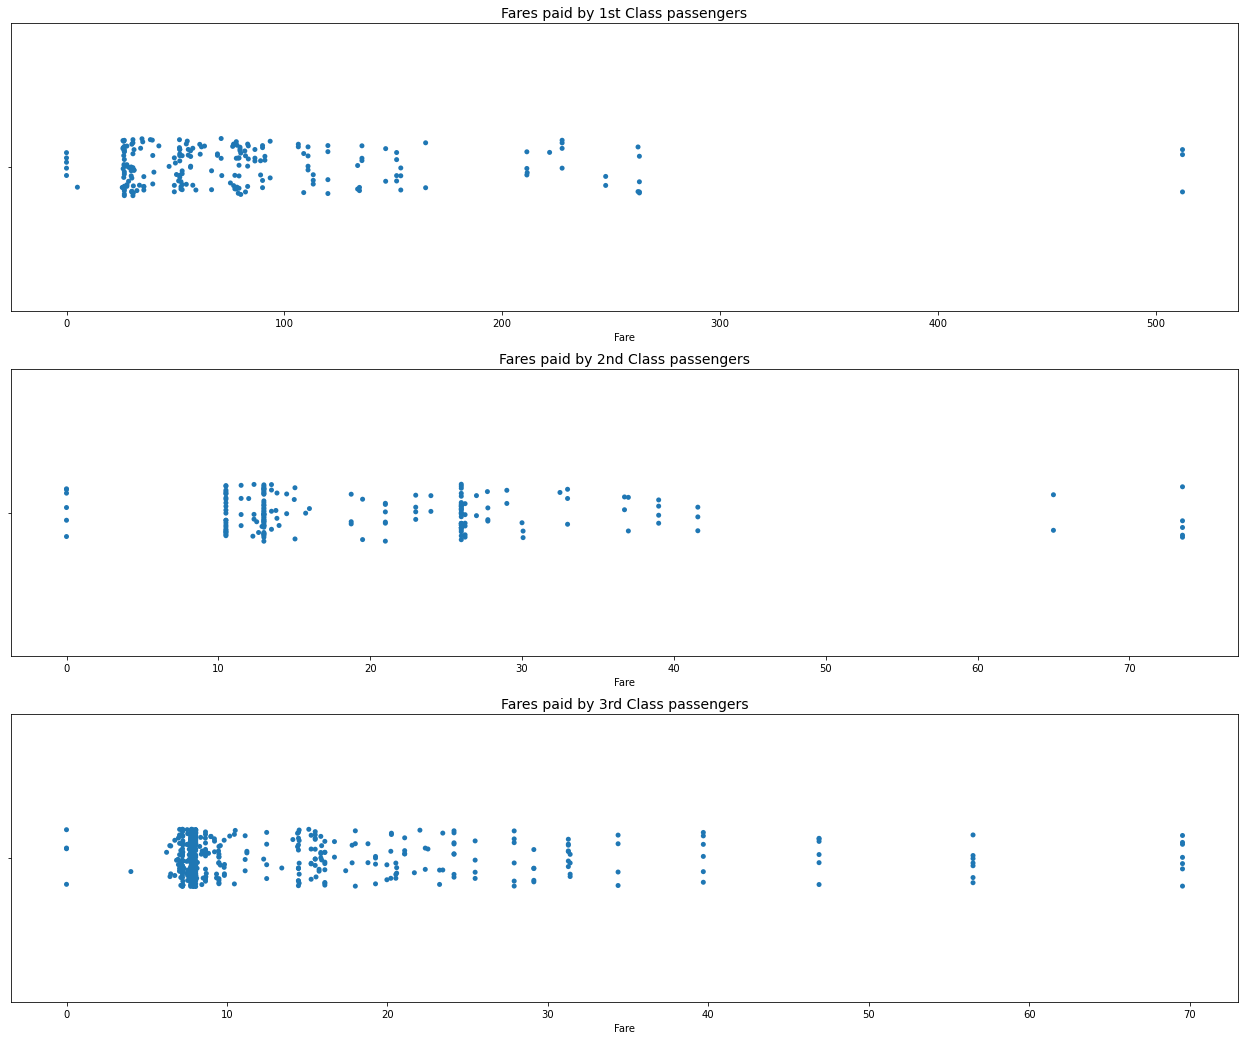

In [1073]:
fig, ax = plt.subplots(3, 1, figsize = (22,18))


sns.stripplot(x=train_data[train_data['Pclass'] == 1]['Fare'], ax=ax[0])
ax[0].set_title("Fares paid by 1st Class passengers", fontsize='14')

sns.stripplot(x=train_data[train_data['Pclass'] == 2]['Fare'], ax=ax[1])
ax[1].set_title("Fares paid by 2nd Class passengers", fontsize='14')

sns.stripplot(x=train_data[train_data['Pclass'] == 3]['Fare'], ax=ax[2])
ax[2].set_title("Fares paid by 3rd Class passengers", fontsize='14')

plt.show()

No 3rd Class passenger paid more than 70.  The maximum that a 2nd Class passenger paid was around 75.  Meanwhile, there are many 1st Class passengers that paid more than 100, with some paying over 500!

Text(0.5, 1.0, 'Box plot of Fare by Class')

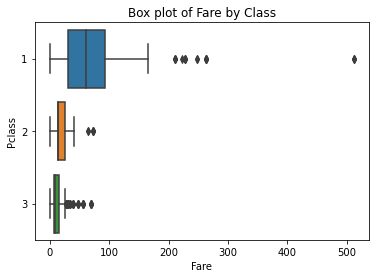

In [1074]:
sns.boxplot(data=train_data, x='Fare', y="Pclass", orient='h')
plt.title("Box plot of Fare by Class")

There is a correlation between Fare and Class.  The higher the Class, the higher the Fare paid.

Text(0.5, 1.0, 'Box plot of Fare by Class')

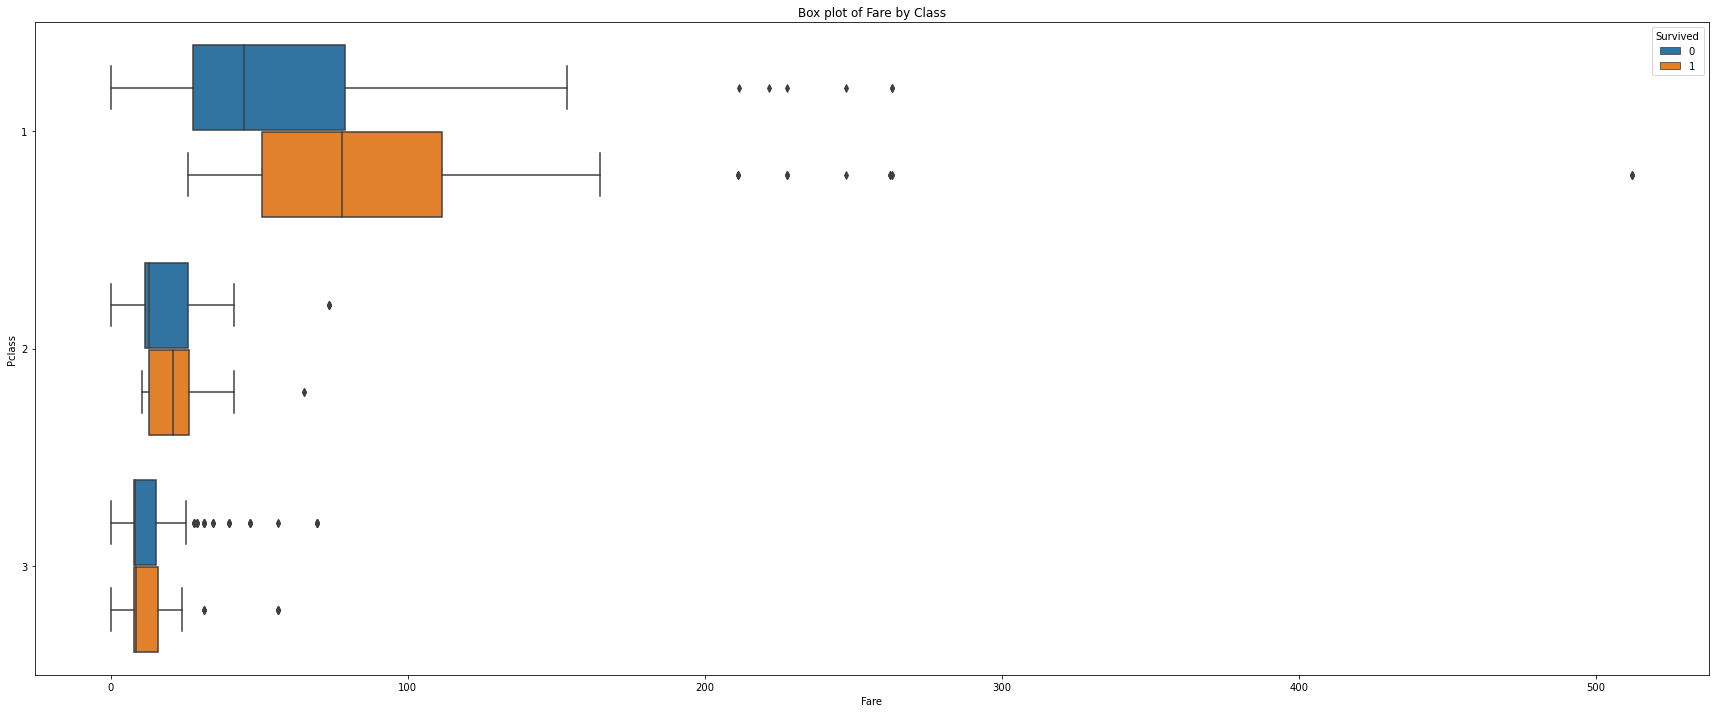

In [1075]:
plt.figure(figsize=(30,12))
sns.boxplot(data=train_data, x='Fare', y="Pclass", hue="Survived", orient='h')
plt.title("Box plot of Fare by Class")

In [1076]:
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Text(0.5, 1.0, 'Survival by number of siblings and spouses')

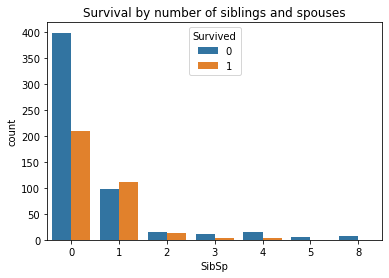

In [1077]:
sns.countplot(data=train_data, x="SibSp", hue="Survived")
plt.title("Survival by number of siblings and spouses")

Travelling with one other sibling or spouse had the highest survivability.  Travelling with 2 looks pretty good too.

In [1078]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

Text(0.5, 1.0, 'Survival by number of parents and children')

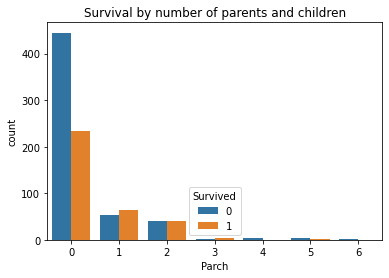

In [1079]:
sns.countplot(data=train_data, x="Parch", hue="Survived")
plt.title("Survival by number of parents and children")

Travelling with 1, 2, or 3 parents or children had the best survivability.

In [1080]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Surname          0
AgeGroup       177
dtype: int64

As it appears that Age and Embarked may have a correlation with Survived, I will eliminate all rows containing null for those columns.  Null values in the Cabin column are not as important as I will not include them in my model.

In [1081]:
train_data.dropna(subset=['Age'], inplace=True)

In [1082]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
Surname          0
AgeGroup         0
dtype: int64

In [1083]:
train_data.dropna(subset=['Cabin'], inplace=True)

In [1084]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Surname        0
AgeGroup       0
dtype: int64

After deleting rows with nulls, recheck for outliers

In [1085]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,AgeGroup
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Adult
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Sandstrom,Child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Bonnell,Senior


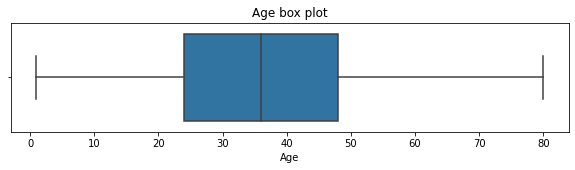

In [1086]:
plt.figure(figsize=(10,2))
sns.boxplot(x=train_data['Age'], fliersize=1)
plt.title('Age box plot');

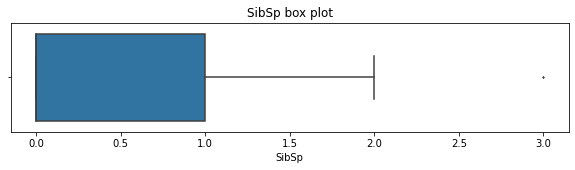

In [1087]:
plt.figure(figsize=(10,2))
sns.boxplot(x=train_data['SibSp'], fliersize=1)
plt.title('SibSp box plot');

In [1088]:
train_data['SibSp'].value_counts()

0    112
1     64
2      6
3      3
Name: SibSp, dtype: int64

In [1089]:
train_data = train_data[train_data['SibSp'] <= 2.0]

In [1090]:
train_data['SibSp'].value_counts()

0    112
1     64
2      6
Name: SibSp, dtype: int64

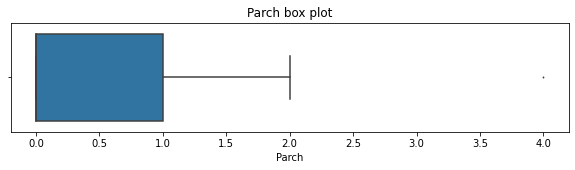

In [1091]:
plt.figure(figsize=(10,2))
sns.boxplot(x=train_data['Parch'], fliersize=1)
plt.title('Parch box plot');

In [1092]:
train_data = train_data[train_data['Parch'] <= 2.0]

In [1093]:
train_data['Parch'].value_counts()

0    124
1     37
2     20
Name: Parch, dtype: int64

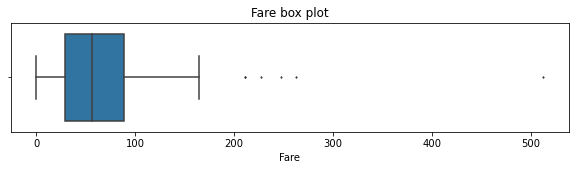

In [1094]:
plt.figure(figsize=(10,2))
sns.boxplot(x=train_data['Fare'], fliersize=1)
plt.title('Fare box plot');

In [1095]:
percentile25 = train_data['Fare'].quantile(.25)

percentile75 = train_data['Fare'].quantile(.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(f"Range of non-outlier values: ({lower_limit}, {upper_limit})")

outliers = train_data[(train_data['Fare'] > upper_limit)| (train_data['Fare'] < lower_limit)]
print(len(outliers))

Range of non-outlier values: (-59.4063, 178.21050000000002)
12


In [1096]:
train_data = train_data[train_data['Fare'] <= 178.21050000000002]

In [1097]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,AgeGroup
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Adult
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Sandstrom,Child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Bonnell,Senior


In [1098]:
# train_data = pd.get_dummies(data=train_data, columns=['Sex', 'Cabin', 'Embarked', 'AgeGroup'])
train_data = pd.get_dummies(data=train_data, columns=['Sex', 'Embarked', 'AgeGroup'])
# dropped Cabin from inclusion in columns since it was not working with the test file / data

In [1099]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Surname,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_Adult,AgeGroup_Child,AgeGroup_Infant,AgeGroup_Senior,AgeGroup_Teen
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,Cumings,1,0,1,0,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,Futrelle,1,0,0,0,1,1,0,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,McCarthy,0,1,0,0,1,1,0,0,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,Sandstrom,1,0,0,0,1,0,1,0,0,0
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,Bonnell,1,0,0,0,1,0,0,0,1,0


In [1100]:
train_data['FirstClass'] = np.where(train_data['Pclass']== 1, 1, 0)

In [1101]:
train_data['SecondClass'] = np.where(train_data['Pclass']== 2, 1, 0)

In [1102]:
train_data['ThirdClass'] = np.where(train_data['Pclass']== 3, 1, 0)

In [1103]:
pd.set_option('display.max_columns', None)

In [1104]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Surname,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_Adult,AgeGroup_Child,AgeGroup_Infant,AgeGroup_Senior,AgeGroup_Teen,FirstClass,SecondClass,ThirdClass
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,Cumings,1,0,1,0,0,1,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,Futrelle,1,0,0,0,1,1,0,0,0,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,McCarthy,0,1,0,0,1,1,0,0,0,0,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,Sandstrom,1,0,0,0,1,0,1,0,0,0,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,Bonnell,1,0,0,0,1,0,0,0,1,0,1,0,0


In [1105]:
X = train_data.drop(columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'Ticket', 'Surname', 'Cabin'])

In [1106]:
y = train_data['Survived']

In [1107]:
model = LogisticRegression(random_state=42, max_iter=500)

model.fit(X, y)

LogisticRegression(max_iter=500, random_state=42)

In [1108]:
test = pd.read_csv('test.csv')

In [1109]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1110]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Logistic regression does not work with null values.  There are three columns with null values in the test data:  Age, Fare, and Cabin.  I do not use Cabin in the logistic regression.  For both Age and Fare, what I will do is calculate the averages for each of those columns and fill in the null values with the average.

In [1111]:
test_age_mean = test['Age'].mean()

In [1112]:
test['Age'] = test['Age'].fillna(test_age_mean)

In [1113]:
test['AgeGroup'] = test['Age'].apply(categorize_age)

In [1114]:
test_fare_mean = test['Fare'].mean()

In [1115]:
test['Fare'] = test['Fare'].fillna(test_fare_mean)

In [1116]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
AgeGroup         0
dtype: int64

In [1117]:
# test = pd.get_dummies(data=test, columns=['Sex', 'Cabin', 'Embarked', 'AgeGroup'])
test = pd.get_dummies(data=test, columns=['Sex', 'Embarked', 'AgeGroup'])

In [1118]:
test['FirstClass'] = np.where(test['Pclass']== 1, 1, 0)

In [1119]:
test['SecondClass'] = np.where(test['Pclass']== 2, 1, 0)

In [1120]:
test['ThirdClass'] = np.where(test['Pclass']== 3, 1, 0)

In [1121]:
X_test = test.drop(columns = ['PassengerId', 'Pclass', 'Name', 'Age', 'Ticket', 'Cabin'])

In [1122]:
y_preds = model.predict(X_test)

In [1124]:
y_preds

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [1125]:
d = {'PassengerId': test['PassengerId'], 'Survived': y_preds}

In [1126]:
submission = pd.DataFrame(data=d)

In [1127]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [1128]:
submission.to_csv('submission.csv', index=False)